In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [3]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [6]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [7]:
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

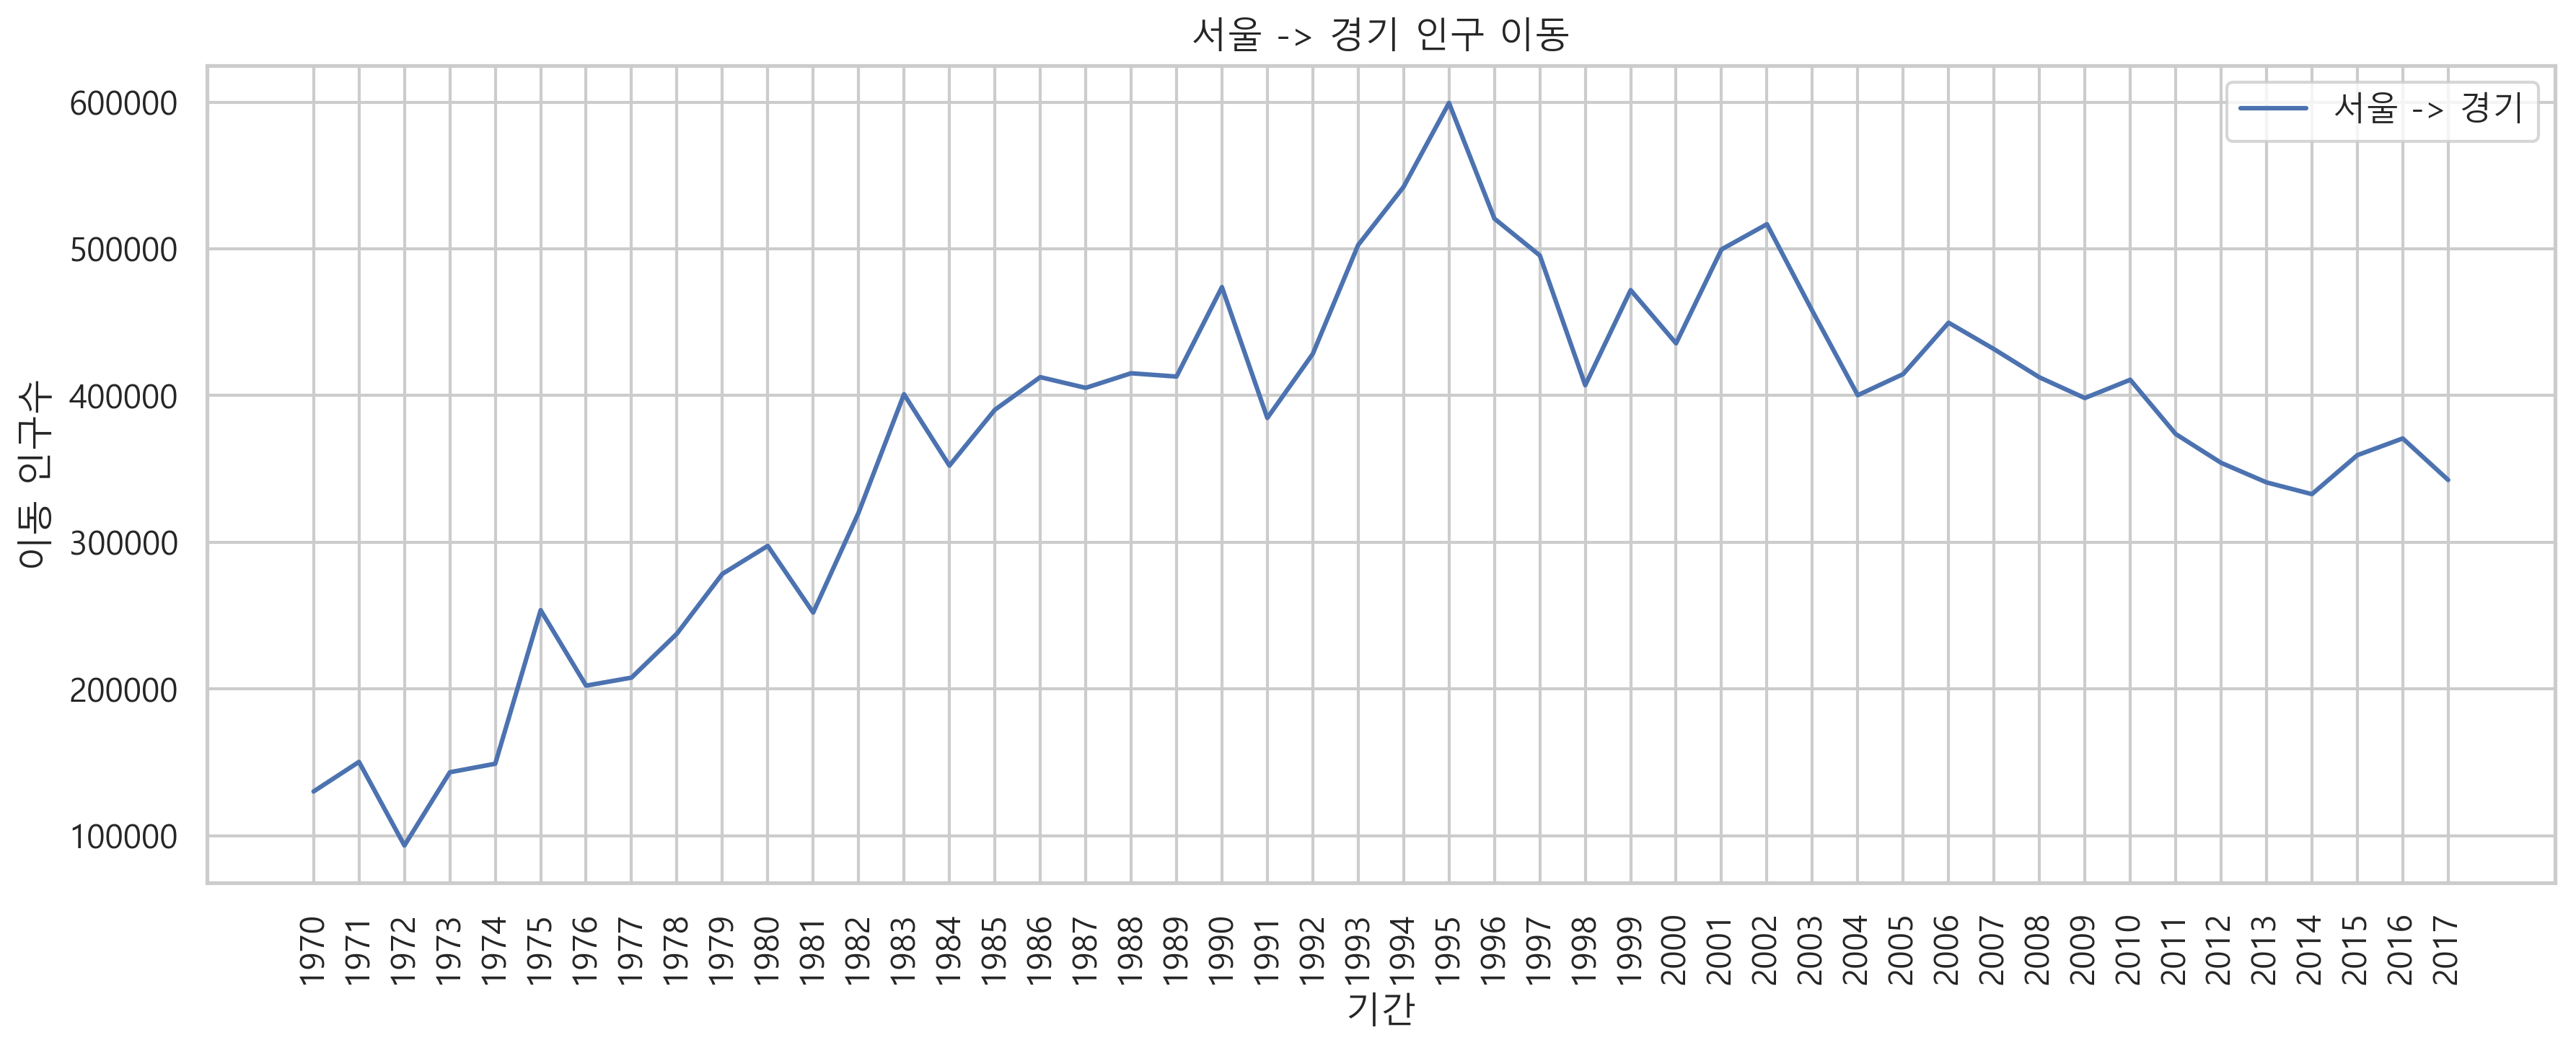

In [8]:
# 그림사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')
# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best')
# 변경사항 저장하고 그래프 출력
plt.show()
